## EDA -- Finding patterns and answering questions

In [1]:
import sys
import random
import numpy as np

from sklearn import linear_model, cross_validation, metrics, svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Shyam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pwd


'C:\\Users\\Shyam\\Documents\\Project'

In [3]:
fdata = pd.read_csv("data/2008.csv")
#f8Data.describe()


In [5]:
fdata.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [57]:
data=fdata.sample(frac=0.1)


In [ ]:
data.to_csv('data/sample1.csv',index = False)

In [8]:
data.head()
print

<function print>

In [9]:
data.isnull().sum().sort_values(ascending=False)

CancellationCode     687404
LateAircraftDelay    548618
SecurityDelay        548618
NASDelay             548618
WeatherDelay         548618
CarrierDelay         548618
ActualElapsedTime     15244
AirTime               15244
ArrDelay              15244
TaxiIn                14984
ArrTime               14984
TaxiOut               13528
DepDelay              13444
DepTime               13444
TailNum                8219
CRSElapsedTime           72
CRSArrTime                0
Month                     0
DayofMonth                0
DayOfWeek                 0
CRSDepTime                0
FlightNum                 0
UniqueCarrier             0
Distance                  0
Diverted                  0
Cancelled                 0
Origin                    0
Dest                      0
Year                      0
dtype: int64

In [10]:
from sklearn.preprocessing import Imputer


In [11]:
#imp = Imputer(missing_values='NaN', strategy='median', axis=0)
rdata=data.fillna(0)

In [12]:
type(rdata)

pandas.core.frame.DataFrame

In [13]:
rdata.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    0
AirTime              0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
SecurityDelay        0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
Year                 0
dtype: int64

In [14]:
rdata['isdelay'] = [1 if x > 15 else 0 for x in rdata['DepDelay'] ]

In [15]:
print(rdata[['DepDelay','isdelay']].head())

         DepDelay  isdelay
537588      304.0        1
6791865       0.0        0
4459827      26.0        1
6047333      -7.0        0
5884787      -5.0        0


In [16]:
print(rdata['isdelay'].value_counts())

0    573384
1    127589
Name: isdelay, dtype: int64


In [17]:
grouped = rdata[['DepDelay', 'UniqueCarrier']].groupby('UniqueCarrier').mean()
rdata['DepDelayed'] = rdata['DepDelay'].apply(lambda x: x>=15)


# Which carrier performs better?

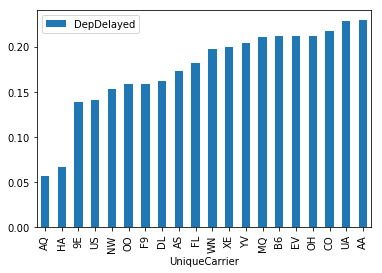

In [18]:
group = rdata[['DepDelayed' , 'UniqueCarrier']].groupby('UniqueCarrier').mean()
carrier = group.sort_values(['DepDelayed'], ascending=True)
#print(carrier)

carrier.plot(kind='bar')

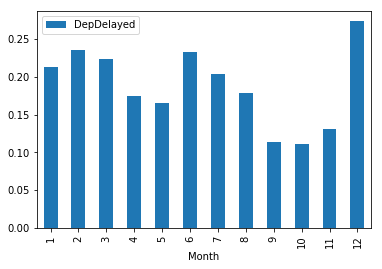

In [19]:
group = rdata[['DepDelayed' , 'Month']].groupby('Month').mean()
#carrier = groupm.sort_values(['DepDelayed'], ascending=True)
#print(carrier)

group.plot(kind='bar')

## When is the best time of day/day of week/time of year to fly to minimise delays? 

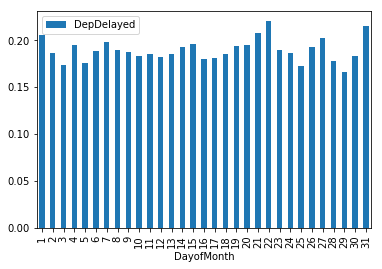

In [20]:
group = rdata[['DepDelayed' , 'DayofMonth']].groupby('DayofMonth').mean()
#carrier = groupm.sort_values(['DepDelayed'], ascending=True)
#print(carrier)

group.plot(kind='bar')

537588     14
6791865    11
4459827    14
6047333    18
5884787     8
Name: hour, dtype: int64


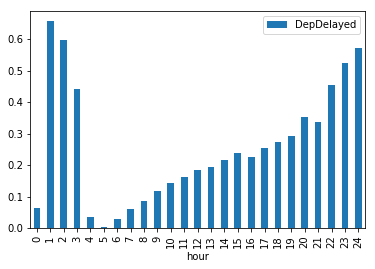

In [21]:
rdata['hour'] = rdata['DepTime'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
print(rdata.hour.head())
grouped = rdata[['DepDelayed', 'hour']].groupby('hour').mean()

grouped.plot(kind='bar')

## Do older planes suffer more delays? 

In [22]:
plane = pd.read_csv("data/plane-data.csv",na_values= [" ", "none"])
plane = plane.dropna(axis=0)

In [23]:
plane = plane[['tailnum','year']]

In [24]:
dj1 = rdata.merge(plane, left_on='TailNum', right_on='tailnum')

In [28]:
type(dj1)

pandas.core.frame.DataFrame

In [30]:
aa = dj1[['TailNum','tailnum']]

In [31]:
aa.head()

,TailNum,tailnum
0,N315AS,N315AS
1,N315AS,N315AS
2,N315AS,N315AS
3,N315AS,N315AS
4,N315AS,N315AS


In [32]:
dj1['ydiff'] = pd.to_numeric(dj1.Year, errors='coerce') - pd.to_numeric(dj1.year, errors='coerce')

In [33]:
print(dj1[['Year','year','ydiff']])

        Year  year  ydiff
0       2008  2002    6.0
1       2008  2002    6.0
2       2008  2002    6.0
3       2008  2002    6.0
4       2008  2002    6.0
5       2008  2002    6.0
6       2008  2002    6.0
7       2008  2002    6.0
8       2008  2002    6.0
9       2008  2002    6.0
10      2008  2002    6.0
11      2008  2002    6.0
12      2008  2002    6.0
13      2008  2002    6.0
14      2008  2002    6.0
15      2008  2002    6.0
16      2008  2002    6.0
17      2008  2002    6.0
18      2008  2002    6.0
19      2008  2002    6.0
20      2008  2002    6.0
21      2008  2002    6.0
22      2008  2002    6.0
23      2008  2002    6.0
24      2008  2002    6.0
25      2008  2002    6.0
26      2008  2002    6.0
27      2008  2002    6.0
28      2008  2002    6.0
29      2008  2002    6.0
...      ...   ...    ...
619938  2008  1997   11.0
619939  2008  1997   11.0
619940  2008  1990   18.0
619941  2008  1990   18.0
619942  2008  1990   18.0
619943  2008  1990   18.0
619944  2008

In [34]:

#page = dj1[['DepDelayed','year','ydiff']]
page = dj1[['DepDelayed','ydiff']]
#type(page)

In [35]:
#aa = page.groupby('year').mean()
aa = page.groupby('ydiff').mean()

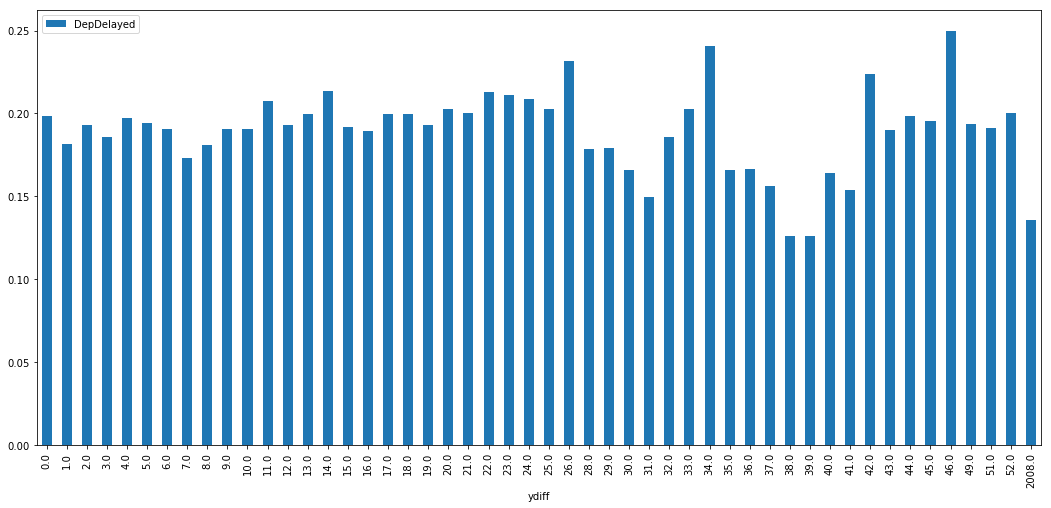

In [36]:
aa.plot(kind = 'bar',figsize=(18,8))

## Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system? 

In [37]:
cas1 = dj1[(dj1['Month'] == 2)  ] ## Memory error

In [38]:
cas2 = cas1[(cas1['DayofMonth'] == 5) ]

In [39]:
cas3 = cas2[(cas2['Origin'] == 'DTW') & (cas2['Dest'] == 'BWI') ] ##60minutes delay

In [40]:
pd.options.display.max_columns = None
cas3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,isdelay,DepDelayed,hour,tailnum,year,ydiff
551842,2008,2,5,2,1125.0,1025,1318.0,1154,NW,1136,N8923E,113.0,89.0,68.0,84.0,60.0,DTW,BWI,408,8.0,37.0,0,0,0,60.0,0.0,24.0,0.0,0.0,1,True,11,N8923E,1967,41.0


In [41]:
cas11 = dj1[(dj1['Month'] == 2)  ] ## Mamory error
cas21 = cas11[(cas11['DayofMonth'] == 5) ]
cas31 = cas21[(cas21['Origin'] == 'BWI') & (cas21['DepDelay'] > 15) ] ##60minutes delay

In [42]:
cas31

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,isdelay,DepDelayed,hour,tailnum,year,ydiff
148765,2008,2,5,2,1335.0,1305,1524.0,1500,WN,1945,N311SW,169.0,175.0,156.0,24.0,30.0,BWI,MCI,967,6.0,7.0,0,0,0,0.0,0.0,0.0,0.0,24.0,1,True,13,N311SW,1986,22.0
268307,2008,2,5,2,1036.0,1015,1314.0,1305,WN,1570,N312SW,158.0,170.0,142.0,9.0,21.0,BWI,RSW,919,4.0,12.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1,True,10,N312SW,1986,22.0
406659,2008,2,5,2,1942.0,1905,2056.0,2020,WN,3134,N378SW,74.0,75.0,59.0,36.0,37.0,BWI,MHT,377,4.0,11.0,0,0,0,35.0,0.0,0.0,0.0,1.0,1,True,19,N378SW,1994,14.0


In [43]:
from datetime import date
holidays = [
        (2007, 1, 1), (2007, 1, 15), (2007, 2, 19), (2007, 5, 28), (2007, 6, 7), (2007, 7, 4),
        (2007, 9, 3), (2007, 10, 8), (2007, 11, 11), (2007, 11, 22), (2007, 12, 25), 
        (2008, 1, 1), (2008, 1, 21), (2008, 2, 18), (2008, 5, 22), (2008, 5, 26), (2008, 7, 4),
        (2008, 9, 1), (2008, 10, 13), (2008, 11, 11), (2008, 11, 27), (2008, 12, 25)
     ]

In [44]:
holidays1 = [
        date(2007, 1, 1), date(2007, 1, 15), date(2007, 2, 19), date(2007, 5, 28), date(2007, 6, 7), date(2007, 7, 4), \
        date(2007, 9, 3), date(2007, 10, 8), date(2007, 11, 11), date(2007, 11, 22), date(2007, 12, 25), \
        date(2008, 1, 1), date(2008, 1, 21), date(2008, 2, 18), date(2008, 5, 22), date(2008, 5, 26), date(2008, 7, 4), \
        date(2008, 9, 1), date(2008, 10, 13), date(2008, 11, 11), date(2008, 11, 27), date(2008, 12, 25) \
     ]


In [45]:
holiday = pd.DataFrame(holidays, columns=['y','m','d'],dtype=int)

In [46]:
hflag = dj1.merge(holiday, left_on= ['Year','Month','DayofMonth'], right_on=['y','m','d'],how='left')

In [47]:
hflag = hflag.fillna(0)

In [48]:
#[1 if x > 15 else 0 for x in rdata['DepDelay'] ]
hflag['hf'] = [1 if x > 0 else 0 for x in hflag['y'] ]


In [49]:
hflag['hour'] = hflag['CRSDepTime'].map(lambda x: int(str(int(x)).zfill(4)[:2]))

In [50]:
hflag.hour.head()

0     9
1    19
2     7
3     7
4    22
Name: hour, dtype: int64

In [51]:
def days_from_nearest_holiday(year, month, day):
  d = date(year, month, day)
  x = [(abs(d-h)).days for h in holidays1]
  return min(x)

In [52]:
days_from_nearest_holiday(2008,1,12)

9

In [53]:
type(aa)

pandas.core.frame.DataFrame

In [54]:
hflag['d2h'] = hflag.apply(lambda x: days_from_nearest_holiday(x['Year'],x['Month'],x['DayofMonth']),axis=1)

In [55]:
import pickle as pkl

In [56]:
hflag.to_pickle('dataset.pkl')